In [14]:
from utils.tools import * 

In [15]:
path=r"C:\Users\cjang\Desktop\\"
path2 = r"C:\Users\cjang\Desktop\impedance_data\data\\" 
data = ['DE_40_1_30.mpt']

In [23]:
adj_re = mpt_data(path, data)
re2 = mpt_data(path2, data)


No handles with labels found to put in legend.


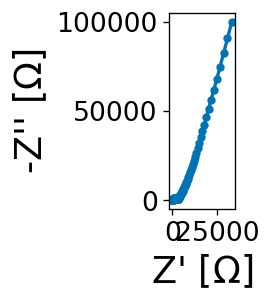

In [24]:
adj_re.mpt_plot()

No handles with labels found to put in legend.


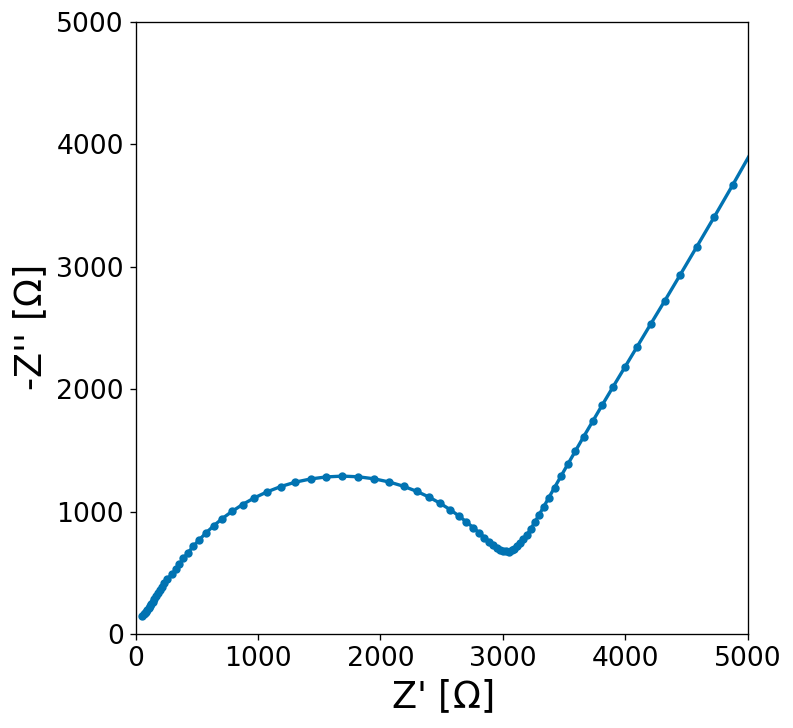

In [25]:
adj_re.set_new_gph_dims(15,15)
adj_re.mpt_plot(x_window = [0,5000], y_window = [0,5000])

In [12]:
#GUESSES BROUGHT FROM INIT VALUES
Rs_guess = 40

R_guess = 2959
n_guess = 0.8
fs_guess = 23023

R2_guess = 258738
n2_guess = 0.8
fs2_guess = 0.2


#COMPLETE FUNCTION
fit_guess = adj_re.guesser(Rs_guess,R_guess,n_guess,fs_guess,R2_guess,n2_guess,fs2_guess)

KeyboardInterrupt: 

In [ ]:
adj_re.mpt_plot(fitting = 'on', x_window = [0,5000], y_window = [0,5000])

No handles with labels found to put in legend.


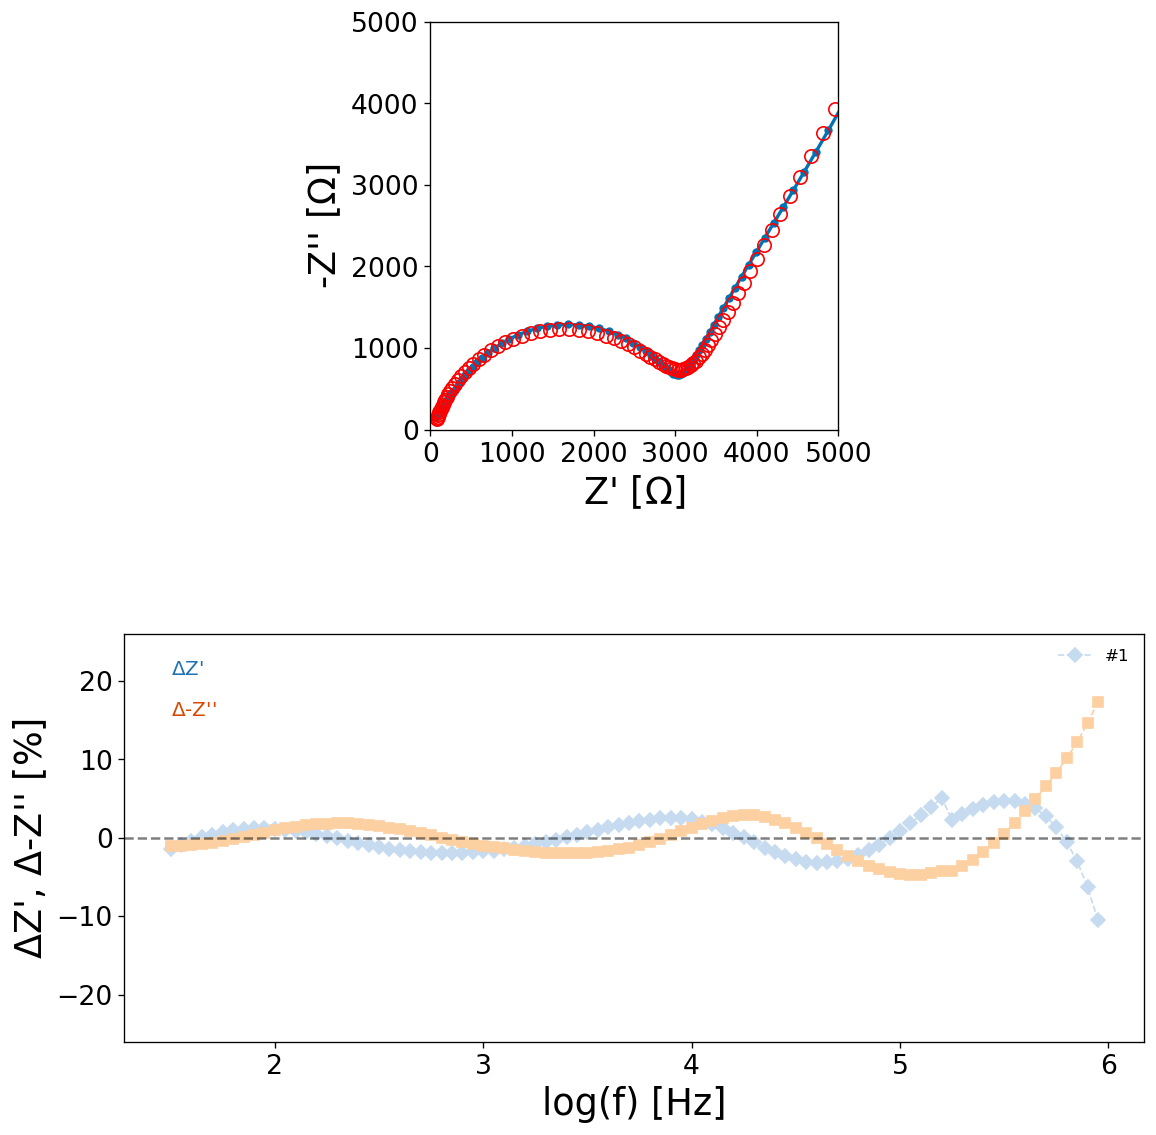

In [9]:
adj_re.mpt_plot(fitting = 'on',rr = 'on', x_window = [0,5000], y_window = [0,5000])

In [22]:
final_package = adj_re.fit_Rs, adj_re.fit_R, adj_re.fit_Q, adj_re.fit_n, adj_re.fit_R2, adj_re.fit_Q2, adj_re.fit_n2

In [23]:
for i in final_package:
    print(i[0])

40.552342901104296
2955.5313262122336
1.4455858192836894e-08
0.8466001044798444
296984.9208669698
2.744996826660533e-06
0.7105556425404013


cycle || No. RC-elements ||   u
[1]            10            0.87


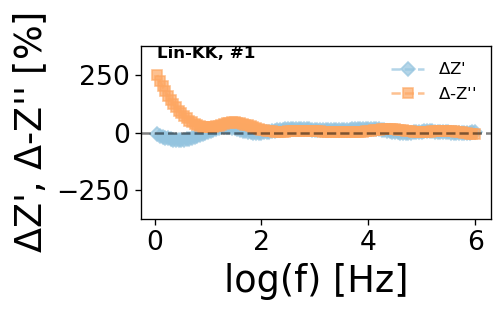

In [27]:
adj_re.Lin_KK(plot = 'residuals')

cycle || No. RC-elements ||   u
[1]            10            0.87


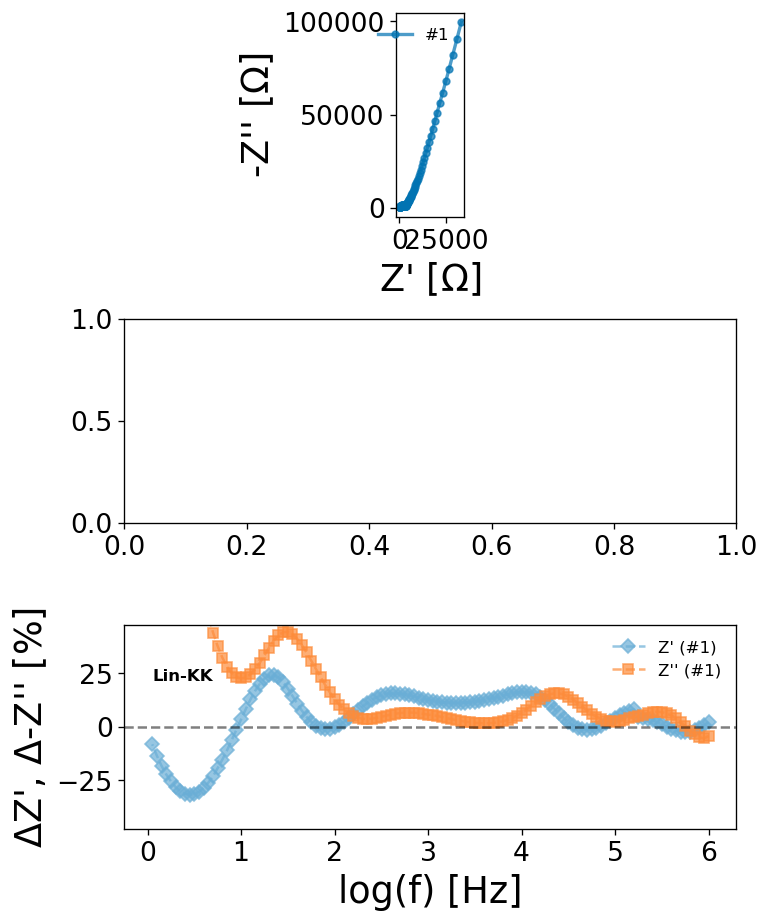

In [28]:
adj_re.Lin_KK(plot = 'w_data')

In [33]:
num_RC='auto' 
legend='on'
plot='residuals'
bode='off'
nyq_xlim='none'
nyq_ylim='none'
weight_func='Boukamp'

In [34]:

print('cycle || No. RC-elements ||   u')
adj_re.decade = []
adj_re.Rparam = []
adj_re.t_const = []
adj_re.Lin_KK_Fit = []
adj_re.R_names = []
adj_re.KK_R0 = []
adj_re.KK_R = []
adj_re.number_RC = []
adj_re.number_RC_sort = []

adj_re.KK_u = []
adj_re.KK_Rgreater = []
adj_re.KK_Rminor = []
M = 2
for i in range(len(adj_re.df)):
    adj_re.decade.append(np.log10(np.max(adj_re.df[i].f))-np.log10(np.min(adj_re.df[i].f))) #determine the number of RC circuits based on the number of decades measured and num_RC
    adj_re.number_RC.append(M)
    adj_re.number_RC_sort.append(M) #needed for adj_re.KK_R
    adj_re.Rparam.append(KK_Rnam_val(re=adj_re.df[i].re, re_start=adj_re.df[i].re.idxmin(), num_RC=int(adj_re.number_RC[i]))[0]) #Creates intial guesses for R's
    adj_re.t_const.append(KK_timeconst(w=adj_re.df[i].w, num_RC=int(adj_re.number_RC[i]))) #Creates time constants values for adj_re.number_RC -(RC)- circuits
    
    adj_re.Lin_KK_Fit.append(minimize(KK_errorfunc, adj_re.Rparam[i], method='leastsq', args=(adj_re.df[i].w.values, adj_re.df[i].re.values, adj_re.df[i].im.values, adj_re.number_RC[i], weight_func, adj_re.t_const[i]) )) #maxfev=99
    adj_re.R_names.append(KK_Rnam_val(re=adj_re.df[i].re, re_start=adj_re.df[i].re.idxmin(), num_RC=int(adj_re.number_RC[i]))[1]) #creates R names
    for j in range(len(adj_re.R_names[i])):
        adj_re.KK_R0.append(adj_re.Lin_KK_Fit[i].params.get(adj_re.R_names[i][j]).value)
adj_re.number_RC_sort.insert(0,0) #needed for adj_re.KK_R
for i in range(len(adj_re.df)):
    adj_re.KK_R.append(adj_re.KK_R0[int(np.cumsum(adj_re.number_RC_sort)[i]):int(np.cumsum(adj_re.number_RC_sort)[i+1])]) #assigns resistances from each spectra to their respective df
    adj_re.KK_Rgreater.append(np.where(np.array(adj_re.KK_R)[i] >= 0, np.array(adj_re.KK_R)[i], 0) )
    adj_re.KK_Rminor.append(np.where(np.array(adj_re.KK_R)[i] < 0, np.array(adj_re.KK_R)[i], 0) )
    adj_re.KK_u.append(1-(np.abs(np.sum(adj_re.KK_Rminor[i]))/np.abs(np.sum(adj_re.KK_Rgreater[i]))))

for i in range(len(adj_re.df)):
    while adj_re.KK_u[i] <= 0.75 or adj_re.KK_u[i] >= 0.88:
        adj_re.number_RC_sort0 = []
        adj_re.KK_R_lim = []
        adj_re.number_RC[i] = adj_re.number_RC[i] + 1
        adj_re.number_RC_sort0.append(adj_re.number_RC)
        adj_re.number_RC_sort = np.insert(adj_re.number_RC_sort0, 0,0)
        adj_re.Rparam[i] = KK_Rnam_val(re=adj_re.df[i].re, re_start=adj_re.df[i].re.idxmin(), num_RC=int(adj_re.number_RC[i]))[0] #Creates intial guesses for R's
        adj_re.t_const[i] = KK_timeconst(w=adj_re.df[i].w, num_RC=int(adj_re.number_RC[i])) #Creates time constants values for adj_re.number_RC -(RC)- circuits
        adj_re.Lin_KK_Fit[i] = minimize(KK_errorfunc, adj_re.Rparam[i], method='leastsq', args=(adj_re.df[i].w.values, adj_re.df[i].re.values, adj_re.df[i].im.values, adj_re.number_RC[i], weight_func, adj_re.t_const[i]) ) #maxfev=99
        adj_re.R_names[i] = KK_Rnam_val(re=adj_re.df[i].re, re_start=adj_re.df[i].re.idxmin(), num_RC=int(adj_re.number_RC[i]))[1] #creates R names
        adj_re.KK_R0 = np.delete(np.array(adj_re.KK_R0), np.s_[0:len(adj_re.KK_R0)])
        adj_re.KK_R0 = []
        for q in range(len(adj_re.df)):
            for j in range(len(adj_re.R_names[q])):
                adj_re.KK_R0.append(adj_re.Lin_KK_Fit[q].params.get(adj_re.R_names[q][j]).value)
        adj_re.KK_R_lim = np.cumsum(adj_re.number_RC_sort) #used for KK_R[i]

        adj_re.KK_R[i] = adj_re.KK_R0[adj_re.KK_R_lim[i]:adj_re.KK_R_lim[i+1]] #assigns resistances from each spectra to their respective df
        adj_re.KK_Rgreater[i] = np.where(np.array(adj_re.KK_R[i]) >= 0, np.array(adj_re.KK_R[i]), 0)
        adj_re.KK_Rminor[i] = np.where(np.array(adj_re.KK_R[i]) < 0, np.array(adj_re.KK_R[i]), 0)
        adj_re.KK_u[i] = 1-(np.abs(np.sum(adj_re.KK_Rminor[i]))/np.abs(np.sum(adj_re.KK_Rgreater[i])))
    else:
        print('['+str(i+1)+']'+'            '+str(adj_re.number_RC[i]),'           '+str(np.round(adj_re.KK_u[i],2)))


cycle || No. RC-elements ||   u
[1]            10            0.87


In [75]:
adj_re.KK_circuit_fit = []
adj_re.KK_rr_re = []
adj_re.KK_rr_im = []
functs = []
for i in range(2,81):
    functs.append('KK_RC'+str(i))

for i in range(len(adj_re.df)):
    cir_num = int(adj_re.number_RC[i])
    cir_funct = eval(functs[cir_num - 2])
    adj_re.KK_circuit_fit.append(cir_funct(w=adj_re.df[0].w, Rs=adj_re.Lin_KK_Fit[0].params.get('Rs').value, R_values=adj_re.KK_R[0], t_values=adj_re.t_const[0]))
    if cir_num >= 81:
        print('RC simulation circuit not defined')
        print('   Number of RC = ', adj_re.number_RC)
    adj_re.KK_rr_re.append(residual_real(re=adj_re.df[i].re, fit_re=adj_re.KK_circuit_fit[i].real, fit_im=-adj_re.KK_circuit_fit[i].imag)) #relative residuals for the real part
    adj_re.KK_rr_im.append(residual_imag(im=adj_re.df[i].im, fit_re=adj_re.KK_circuit_fit[i].real, fit_im=-adj_re.KK_circuit_fit[i].imag)) #relative residuals for the imag part


In [76]:
adj_re.KK_circuit_fit 


[0           50.474361-157.951001j
 1           63.001851-169.047838j
 2           75.620571-179.513699j
 3           88.036443-189.625291j
 4          100.031031-199.741173j
                   ...            
 115    34059.978954-10983.175558j
 116    34795.305360-10008.195282j
 117     35398.869889-9085.865102j
 118     35890.750111-8225.527027j
 119     36295.621870-7418.588355j
 Name: w, Length: 120, dtype: complex128]

In [78]:
adj_re.KK_rr_re * 100
#adj_re.KK_rr_im

5442
 116   -0.223309
 117   -0.183432
 118   -0.136242
 119   -0.082432
 Name: re, Length: 120, dtype: float64, 0      0.021554
 1      0.005473
 2     -0.006992
 3     -0.016690
 4     -0.023852
          ...   
 115   -0.255442
 116   -0.223309
 117   -0.183432
 118   -0.136242
 119   -0.082432
 Name: re, Length: 120, dtype: float64, 0      0.021554
 1      0.005473
 2     -0.006992
 3     -0.016690
 4     -0.023852
          ...   
 115   -0.255442
 116   -0.223309
 117   -0.183432
 118   -0.136242
 119   -0.082432
 Name: re, Length: 120, dtype: float64, 0      0.021554
 1      0.005473
 2     -0.006992
 3     -0.016690
 4     -0.023852
          ...   
 115   -0.255442
 116   -0.223309
 117   -0.183432
 118   -0.136242
 119   -0.082432
 Name: re, Length: 120, dtype: float64, 0      0.021554
 1      0.005473
 2     -0.006992
 3     -0.016690
 4     -0.023852
          ...   
 115   -0.255442
 116   -0.223309
 117   -0.183432
 118   -0.136242
 119   -0.082432
 Name: re, Length: 120,

In [79]:
#adj_re.KK_rr_re
adj_re.KK_rr_im * 100

1302
 116    1.786648
 117    2.002104
 118    2.235769
 119    2.492700
 Name: im, Length: 120, dtype: float64, 0     -0.043917
 1     -0.054850
 2     -0.048977
 3     -0.035795
 4     -0.018356
          ...   
 115    1.591302
 116    1.786648
 117    2.002104
 118    2.235769
 119    2.492700
 Name: im, Length: 120, dtype: float64, 0     -0.043917
 1     -0.054850
 2     -0.048977
 3     -0.035795
 4     -0.018356
          ...   
 115    1.591302
 116    1.786648
 117    2.002104
 118    2.235769
 119    2.492700
 Name: im, Length: 120, dtype: float64, 0     -0.043917
 1     -0.054850
 2     -0.048977
 3     -0.035795
 4     -0.018356
          ...   
 115    1.591302
 116    1.786648
 117    2.002104
 118    2.235769
 119    2.492700
 Name: im, Length: 120, dtype: float64, 0     -0.043917
 1     -0.054850
 2     -0.048977
 3     -0.035795
 4     -0.018356
          ...   
 115    1.591302
 116    1.786648
 117    2.002104
 118    2.235769
 119    2.492700
 Name: im, Length: 120,

In [73]:
eval(functs[cir_num - 2])

0           50.474361-157.951001j
1           63.001851-169.047838j
2           75.620571-179.513699j
3           88.036443-189.625291j
4          100.031031-199.741173j
                  ...            
115    34059.978954-10983.175558j
116    34795.305360-10008.195282j
117     35398.869889-9085.865102j
118     35890.750111-8225.527027j
119     36295.621870-7418.588355j
Name: w, Length: 120, dtype: complex128

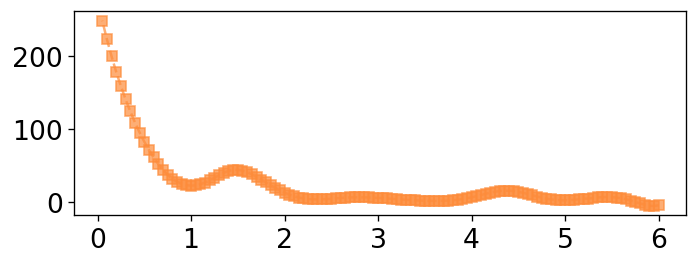

In [93]:
fig = figure(figsize=(6, 8), dpi=120, facecolor='w', edgecolor='k')
fig.subplots_adjust(left=0.1, right=0.95, hspace=0.5, bottom=0.1, top=0.95)
#ax = fig.add_subplot(311, aspect='equal')
#ax1 = fig.add_subplot(312)
ax2 = fig.add_subplot(313)


colors = sns.color_palette("colorblind", n_colors=len(adj_re.df))
colors_real = sns.color_palette("Blues", n_colors=len(adj_re.df)+2)
colors_imag = sns.color_palette("Oranges", n_colors=len(adj_re.df)+2)


#ax2.plot(np.log10(adj_re.df[i].f), adj_re.KK_rr_re[i]*100, color=colors_real[i+1], marker='D', ls='--', ms=6, alpha=.7, label=adj_re.label_re_1[i])
ax2.plot(np.log10(adj_re.df[i].f), adj_re.KK_rr_im[i]*100, color=colors_imag[i+1], marker='s', ls='--', ms=6, alpha=.7, label=adj_re.label_im_1[i])

In [98]:
np.log10(adj_re.df[0].f), adj_re.KK_rr_re[0]*100

(0      6.000008
 1      5.949998
 2      5.900002
 3      5.850002
 4      5.800000
          ...   
 115    0.250326
 116    0.199943
 117    0.149908
 118    0.100258
 119    0.050181
 Name: f, Length: 120, dtype: float64, 0       2.155356
 1       0.547337
 2      -0.699239
 3      -1.668959
 4      -2.385213
          ...    
 115   -25.544185
 116   -22.330908
 117   -18.343172
 118   -13.624246
 119    -8.243212
 Name: re, Length: 120, dtype: float64)

In [96]:
np.log10(adj_re.df[0].f), adj_re.KK_rr_im[0]*100

(0      6.000008
 1      5.949998
 2      5.900002
 3      5.850002
 4      5.800000
          ...   
 115    0.250326
 116    0.199943
 117    0.149908
 118    0.100258
 119    0.050181
 Name: f, Length: 120, dtype: float64, 0       -4.391716
 1       -5.484998
 2       -4.897739
 3       -3.579462
 4       -1.835600
           ...    
 115    159.130240
 116    178.664816
 117    200.210400
 118    223.576856
 119    249.270000
 Name: im, Length: 120, dtype: float64)

In [99]:
kk_df = pd.DataFrame({'f':np.log10(adj_re.df[0].f), 're':adj_re.KK_rr_re[0]*100, 'im':adj_re.KK_rr_im[0]*100})

In [100]:
kk_df

,f,re,im
0,6.000008,2.155356,-4.391716
1,5.949998,0.547337,-5.484998
2,5.900002,-0.699239,-4.897739
3,5.850002,-1.668959,-3.579462
4,5.800000,-2.385213,-1.835600
...,...,...,...
115,0.250326,-25.544185,159.130240
116,0.199943,-22.330908,178.664816
117,0.149908,-18.343172,200.210400
118,0.100258,-13.624246,223.576856
